# "Date-a-Scientist" (Codecademy - Data science path capstone project)

In this project I investigated a dataset containing information about different profiles of people registered to a dating app to answer some questions:

#### What is the sexual orientation of the people registered to the app?
#### What is the most frequent body type?
#### What is the income distribution?
#### Can you predict income or body type given other features?

To answer the first three questions I did not need to preprocess data, it was enough to create graphs to get a good overview both on the dataset and on the results I wanted to explore.

While for the last question I focused my attention on two "body type" and "income": I first needed to preprocess data to allow for feature engineering and normalization. I then tried to build a model to classify or predict body type or income of a certain person based on some of the other features available. Models were fine tuned and evaluated.

The focus of this project was not limited solely to create a functioning model capable of predicting information but rather be a starting point from which exploring the machine learning process. Any valuable improvement would be welcome!

In [1]:
#Preliminary import of necessary libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression

pd.options.display.max_columns = None

# Business Questions

1) What is the sexual orientation of the people registered to the app?

2) What is the most frequent body type?

3) What is the income distribution?

4) Predict "Body type" based on following features: age, drinks, drug, smokes, height, diet 

5) Predict "Income" based on following features: age, speaks, education

# Data understanding & preparation

In [2]:
#Loading Dataframe
df = pd.read_csv("profiles.csv")

#Dataframe head
df

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,NaN,NaN,socially,never,graduated from college/university,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",i am an avid movie watcher and follow the broa...,"my family, my dog, italy, words and music!",writing my book.,"running with my dog, finishing up the work wee...",i have a dream to sing at the alconquin in nyc...,you are seeking a long term co

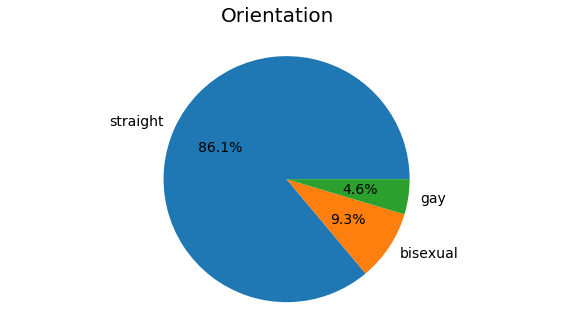

In [3]:
#Orientation
fig1, ax1 = plt.subplots(figsize = [10.0, 5.0])

fig1.suptitle('Orientation', fontsize=20)

ax1.pie(df.orientation.value_counts(), labels=df.orientation.unique(), autopct='%1.1f%%', textprops={'fontsize': 14})
ax1.axis('equal')
plt.show()


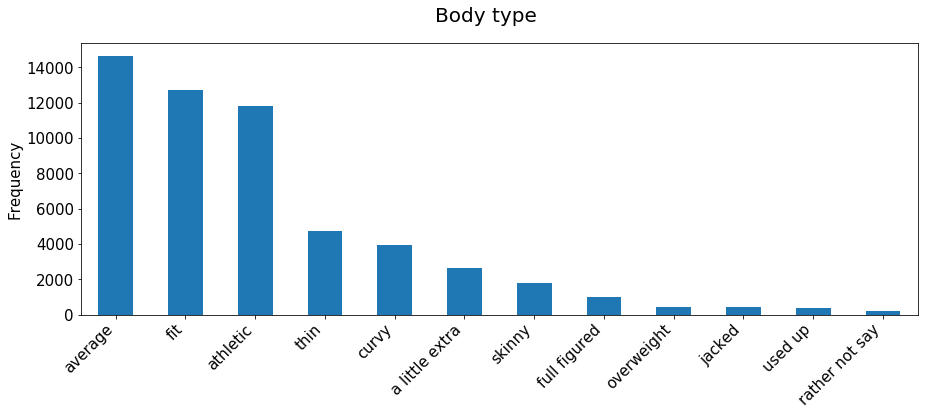

In [4]:
#Body type 
fig2, ax2 = plt.subplots(figsize = [15.0, 5.0])

fig2.suptitle('Body type', fontsize=20)

pd.Series(df.body_type).value_counts().plot(kind='bar', fontsize=15)
ax2.set_ylabel(ylabel = 'Frequency', fontsize=15)
plt.xticks(rotation=45, ha='right')

plt.show()

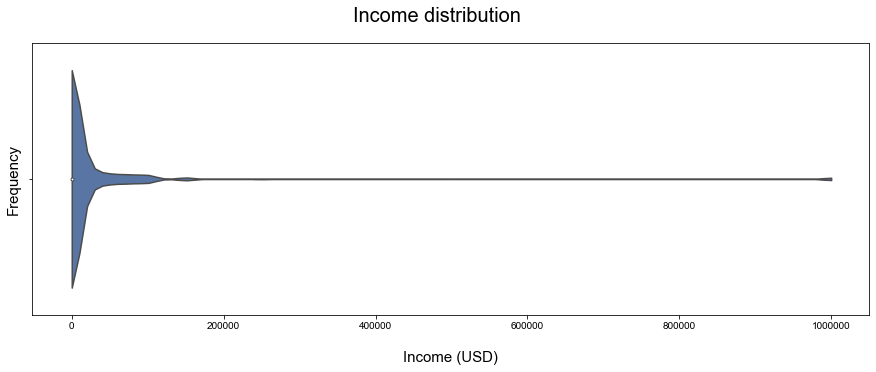

In [5]:
#Income
fig3,ax3 = plt.subplots(figsize = [15.0, 5.0])

fig3.suptitle('Income distribution', fontsize=20)

sns.set(style="whitegrid")
ax3 = sns.violinplot(x=df.income,  cut=0)
ax3.set_xlabel(xlabel = 'Income (USD)', fontsize=15, labelpad = 20)
ax3.set_ylabel(ylabel = 'Frequency', fontsize=15)

plt.show()

# Body Type Analysis (classification)

Dropping rows with null values

In [10]:
body_type_all_data = df[['age', 'drinks', 'drugs', 'smokes', 'height', 'diet', 'body_type']]
body_type_all_data.isnull().mean()

age          0.000000
drinks       0.049795
drugs        0.234878
smokes       0.091949
height       0.000050
diet         0.406950
body_type    0.088346
dtype: float64

In [12]:
body_type_all_data = df[['age', 'drinks', 'drugs', 'smokes', 'height', 'diet', 'body_type']]
body_type_all_data.dropna(inplace = True)
body_type_all_data

C:\Users\alegu\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,drinks,drugs,smokes,height,diet,body_type
0,22,socially,never,sometimes,75.0,strictly anything,a little extra
1,35,often,sometimes,no,70.0,mostly other,average
7,31,socially,never,no,65.0,mostly anything,average
9,37,not at all,never,no,65.0,mostly anything,athletic
11,28,socially,never,no,72.0,mostly anything,average
...,...,...,...,...,...,...,...
59935,33,socially,never,when drinking,67.0,anything,curvy
59936,25,socially,never,no,61.0,mostly anything,average
59942,24,often,sometimes,no,72.0,mostly anything,fit
59943,42,not at all,never,no,71.0,mostly anything,average


Features Engineering

In [112]:
#Converting categorical data into numerical & OneHotEncoding

#Features for "Body type"

#drinks
drinks_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}
body_type_all_data["drinks_code"] = body_type_all_data.drinks.map(drinks_mapping)

#drugs
drugs_mapping = {"never": 0, "sometimes": 1, "often": 2}
body_type_all_data["drugs_code"] = body_type_all_data.drugs.map(drugs_mapping)

#smokes
smokes_mapping = {"no": 0, "trying to quit": 1, "sometimes": 2, "when drinking": 3, "yes": 4}
body_type_all_data["smokes_code"] = body_type_all_data.smokes.map(smokes_mapping)

#diet
"""
Here could be done a further grouping, which does not improve the accuracy score though

body_type_all_data["diet_code"] = body_type_all_data["diet"].apply(lambda x : "anything" if "anything" in str(x)
                                           else ("halal" if "halal" in str(x)
                                                 else ("kosher" if "kosher" in str(x)
                                                       else ("vegan" if "vegan" in str(x)
                                                            else ("vegetarian" if "vegetarian" in str(x)
                                                                 else ("other diet" if "other" in str(x)
                                                                       else "not specified"))))))
"""
labelencoder = LabelEncoder()
body_type_all_data['diet_code'] = labelencoder.fit_transform(body_type_all_data['diet'].astype(str))
body_type_all_data = pd.concat((body_type_all_data,pd.get_dummies(body_type_all_data.diet_code)),1)


body_type_all_data

C:\Users\alegu\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\alegu\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\alegu\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,age,drinks,drugs,smokes,height,diet,body_type,drinks_code,drugs_code,smokes_code,diet_code,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,22,socially,never,sometimes,75.0,strictly anything,a little extra,2,0,2,10,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,35,often,sometimes,no,70.0,mostly other,average,3,1,0,6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,31,socially,never,no,65.0,mostly anything,average,2,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,37,not at all,never,no,65.0,mostly anything,athletic,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,28,socially,never,no,72.0,mostly anything,average,2,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59935,33,socially,never,when drinking,67.0,anything,curvy,2,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59936,25,socially,never,no,61.0,mostly anything,average,2,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59942,24,often,sometimes,no,72.0,mostly anything,fit,3,1,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59943,42,not at all,never,no,71.0,mostly anything,average,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Features Normalization

In [113]:
#Normalization

body_type_features = body_type_all_data.copy()
body_type_features.drop(['drinks', 'drugs', 'smokes', 'diet', 'diet_code', 'body_type'], axis=1, inplace = True)
#body_type_feature_data = body_type_all_data[['age', 'drinks_code', 'drugs_code','smokes_code', 'height']]
#body_type_feature_data = body_type_all_data[[ 'drinks_code', 'drugs_code']]

min_max_scaler = MinMaxScaler()
x = body_type_features.values
x_scaled = min_max_scaler.fit_transform(x)

body_type_features_scaled = pd.DataFrame(x_scaled, columns=body_type_features.columns)

Train and Test Datasets preparation

In [114]:
#Setting labels
"""labelencoder = LabelEncoder()
df['body_type_code'] = labelencoder.fit_transform(df['body_type'])"""
body_type_labels = body_type_all_data['body_type']

#train and test datasets
bd_train_data, bd_test_data, bd_train_labels, bd_test_labels = train_test_split(body_type_features_scaled, body_type_labels, test_size = 0.2, random_state = 1)


K-nearest-neighbour

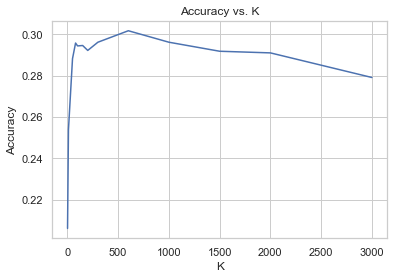

In [115]:
#Seeting best K parameter

scores = []
for k in [1, 10, 50, 80, 100, 150, 200, 300, 600, 1000, 1500, 2000, 3000]:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(bd_train_data, bd_train_labels)
    scores.append(classifier.score(bd_test_data, bd_test_labels))
    
plt.plot([1, 10, 50, 80, 100, 150, 200, 300, 600, 1000, 1500, 2000, 3000], scores)
plt.title('Accuracy vs. K')
plt.ylabel('Accuracy')
plt.xlabel('K');
plt.show()

In [126]:
#Model fitting
classifier = KNeighborsClassifier(n_neighbors = 600)
classifier.fit(bd_train_data, bd_train_labels)
print('K-nn accuracy score is: {0:.3f}'.format(classifier.score(bd_test_data, bd_test_labels)))


K-nn accuracy score is: 0.302


Support Vector Machine with RBF kernel

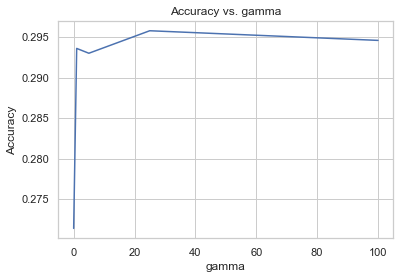

In [127]:
#Investigating the best gamma parameter
scores = []
for this_gamma in [0.01, 1, 5, 25, 100]:
    clf = SVC(kernel = 'rbf', gamma = this_gamma).fit(bd_train_data, bd_train_labels)
    scores.append(clf.score(bd_test_data, bd_test_labels))
    
plt.plot([0.01, 1, 5, 25, 100], scores)
plt.title('Accuracy vs. gamma')
plt.ylabel('Accuracy')
plt.xlabel('gamma');
plt.show()

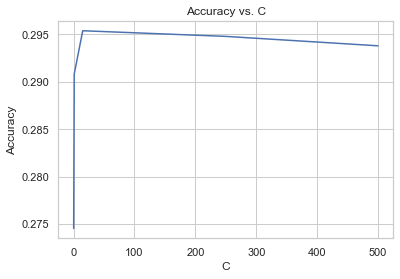

In [128]:
#Investigating the best C parameter
scores = []
for this_C in [0.1, 1, 15, 250, 500]:
    clf = SVC(kernel = 'rbf', C = this_C).fit(bd_train_data, bd_train_labels)
    scores.append(clf.score(bd_test_data, bd_test_labels))
    
plt.plot([0.1, 1, 15, 250, 500], scores)
plt.title('Accuracy vs. C')
plt.ylabel('Accuracy')
plt.xlabel('C');
plt.show()

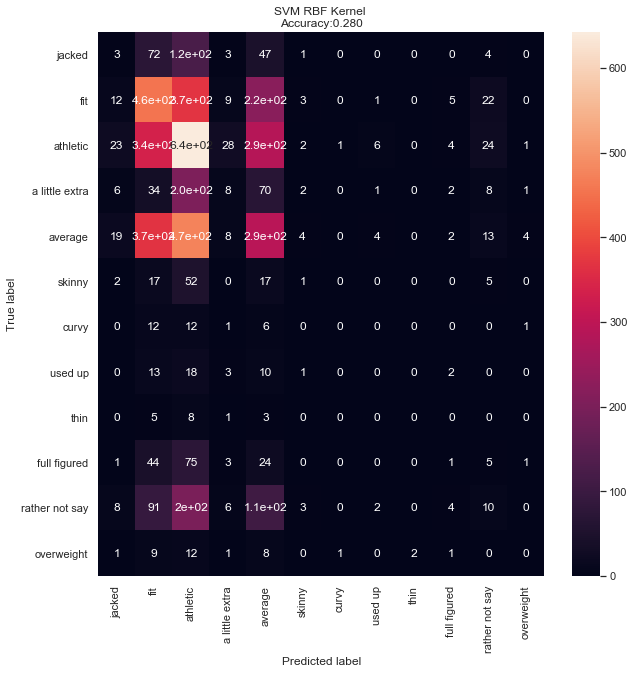

In [129]:
#Model fitting

clf = SVC(kernel = 'rbf', gamma = 25 , C = 15).fit(bd_train_data, bd_train_labels)

svm_predicted = clf.predict(bd_test_data)
confusion = confusion_matrix(bd_test_labels, svm_predicted)

df_cm = pd.DataFrame(confusion, index = [i for i in bd_test_labels.unique()],
                  columns = [i for i in bd_test_labels.unique()])

plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(bd_test_labels, 
                                                                    svm_predicted)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

Most of the predictions fall into "fit", "athletic" and "average" classes and the accuracy does not go much over 30%. It is possibly due to the fact that the features used are not enough to let the model understand which are the characteristics of each class, so it simply predicts the most frequent ones.

It is anyway interesting to notice that there is a difference in the score of the k-nn model and the SVM model: the last one appears to have a higher accuracy

# Income Analysis (regression)

In [16]:
income_all_data = df[['age', 'speaks', 'education', 'income']]
income_all_data['income'].replace(-1, np.nan, inplace = True)
income_all_data.isnull().mean()

age          0.000000
speaks       0.000834
education    0.110566
income       0.808094
dtype: float64

In [ ]:
income_all_data.dropna(inplace = True)
income_all_data

In [228]:
#Features for "Income"

#speaks
substring=","
income_all_data["speaks_code"] = income_all_data["speaks"].apply(lambda x : 0 if str(x).count(substring)==0 
                                           else (1 if str(x).count(substring)==1 
                                                 else (2 if str(x).count(substring)==2 
                                                       else (3 if str(x).count(substring)==3
                                                            else (4 if str(x).count(substring)==4
                                                                 else 5)))))

#education, I am adding a further grouping before converting into numerical
income_all_data["education_code"] = income_all_data["education"].apply(lambda x : "high school" if "high school" in str(x)
                                           else ("college/university" if ("college" in str(x) or "law school" in str(x) or "med school" in str(x) or "space camp" in str(x))
                                                 else "Ph.D"))

income_all_data = pd.concat((income_all_data,pd.get_dummies(income_all_data.education_code)),1)

income_all_data

C:\Users\alegu\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\alegu\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,age,speaks,education,income,speaks_code,education_code,Ph.D,college/university,high school
1,35,"english (fluently), spanish (poorly), french (...",working on space camp,80000.0,2,college/university,0,1,0
3,23,"english, german (poorly)",working on college/university,20000.0,1,college/university,0,1,0
11,28,"english (fluently), sign language (poorly)",graduated from college/university,40000.0,1,college/university,0,1,0
13,30,english,graduated from high school,30000.0,0,high school,0,0,1
14,29,english,working on college/university,50000.0,0,college/university,0,1,0
...,...,...,...,...,...,...,...,...,...
59917,26,"english (fluently), polish (fluently), german ...",graduated from masters program,100000.0,2,Ph.D,1,0,0
59927,26,english,graduated from college/university,50000.0,0,college/university,0,1,0
59930,41,"english, spanish",graduated from college/university,70000.0,1,college/university,0,1,0
59934,43,"english (fluently), french (poorly), japanese ...",graduated from masters program,80000.0,3,Ph.D,1,0,0


In [229]:
#Normalization for "Income" analysis

income_features = income_all_data[['age', 'speaks_code', 'high school', 'college/university', 'Ph.D']]

x = income_features.values
x_scaled = min_max_scaler.fit_transform(x)

income_features_scaled = pd.DataFrame(x_scaled, columns=income_features.columns)

#Normalizing or not normalizing the onehotencoded features does not change the numerical value

In [230]:
#Setting labels
"""labelencoder = LabelEncoder()
income_all_data['body_type_code'] = labelencoder.fit_transform(income_all_data['body_type'])"""
income_labels = income_all_data['income']

#train and test datasets
i_train_data, i_test_data, i_train_labels, i_test_labels = train_test_split(income_features_scaled, income_labels, test_size = 0.2, random_state = 1)

In [231]:
#Model fitting: Linear Regression
linreg = LinearRegression().fit(i_train_data, i_train_labels)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(i_train_data, i_train_labels)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(i_test_data, i_test_labels)))

linear model coeff (w): [-15073.94336944  59013.15861845 -21298.51707483   9643.87839504
  11654.63867979]
linear model intercept (b): 86756.580
R-squared score (training): 0.009
R-squared score (test): 0.016


In [232]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(i_train_data, i_train_labels)
    r2_train = linridge.score(i_train_data, i_train_labels)
    r2_test = linridge.score(i_train_data, i_train_labels)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.3f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.3f}, r-squared test: {:.3f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.000
num abs(coeff) > 1.0: 5, r-squared training: 0.009, r-squared test: 0.009

Alpha = 1.000
num abs(coeff) > 1.0: 5, r-squared training: 0.009, r-squared test: 0.009

Alpha = 10.000
num abs(coeff) > 1.0: 5, r-squared training: 0.009, r-squared test: 0.009

Alpha = 20.000
num abs(coeff) > 1.0: 5, r-squared training: 0.009, r-squared test: 0.009

Alpha = 50.000
num abs(coeff) > 1.0: 5, r-squared training: 0.009, r-squared test: 0.009

Alpha = 100.000
num abs(coeff) > 1.0: 5, r-squared training: 0.009, r-squared test: 0.009

Alpha = 1000.000
num abs(coeff) > 1.0: 5, r-squared training: 0.006, r-squared test: 0.006



In [183]:
#model fitting Ridge
linridge = Ridge(alpha = 1).fit(i_train_data, i_train_labels)

r2_train = linridge.score(i_train_data, i_train_labels)
r2_test = linridge.score(i_train_data, i_train_labels)
print(r2_train)
print(r2_test)

0.008790752248102995
0.008790752248102995


In [233]:
print('Lasso regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linlasso = Lasso(alpha = this_alpha,  max_iter = 10000).fit(i_train_data, i_train_labels)
    r2_train = linlasso.score(i_train_data, i_train_labels)
    r2_test = linlasso.score(i_test_data, i_test_labels)
    num_coeff_bigger = np.sum(abs(linlasso.coef_) > 1.0)
    print('Alpha = {:.3f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.3f}, r-squared test: {:.3f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

C:\Users\alegu\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\alegu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


Lasso regression: effect of alpha regularization parameter

Alpha = 0.000
num abs(coeff) > 1.0: 5, r-squared training: 0.009, r-squared test: 0.016

Alpha = 1.000
num abs(coeff) > 1.0: 5, r-squared training: 0.009, r-squared test: 0.016

Alpha = 10.000
num abs(coeff) > 1.0: 4, r-squared training: 0.009, r-squared test: 0.016

Alpha = 20.000
num abs(coeff) > 1.0: 4, r-squared training: 0.009, r-squared test: 0.016

Alpha = 50.000
num abs(coeff) > 1.0: 4, r-squared training: 0.009, r-squared test: 0.016

Alpha = 100.000
num abs(coeff) > 1.0: 4, r-squared training: 0.009, r-squared test: 0.016

Alpha = 1000.000
num abs(coeff) > 1.0: 2, r-squared training: 0.008, r-squared test: 0.014



C:\Users\alegu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171876261946102.94, tolerance: 34680117369.51984
  positive)


In [185]:
#model fitting Lasso 
linlasso = Lasso(alpha = 1,  max_iter = 10000).fit(i_train_data, i_train_labels)

r2_train = linlasso.score(i_train_data, i_train_labels)
r2_test = linlasso.score(i_test_data, i_test_labels)
print(r2_train)
print(r2_test)

0.008790769883756044
0.015595619837834862
